In [1]:
# Specify the directory where  to save the plots
import os
plot_save_path="C:\\Users\\Jose Luis\\Desktop\\Plots"

#plot_save_path="C:\\Users\\e410675\\OneDrive - London South Bank University\\Desktop\\Plots"


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics

from sklearn.metrics import mean_absolute_error

from itertools import product

import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['axes.grid'] = False

In [4]:
df = pd.read_excel('Daily-discharge-sitrep-timeseries-data-webfile-April2021-January2025-F1.xlsx')
df

,Date,Number of patients who no longer meet the criteria to reside,Number of patients discharged,Number of patients remaining in hospital who no longer meet the criteria to reside
0,2021-04-01,17663.0,9279.0,8384.0
1,2021-04-02,14470.0,7342.0,7128.0
2,2021-04-03,12180.0,5175.0,7005.0
3,2021-04-04,11043.0,4394.0,6649.0
4,2021-04-05,11253.0,4577.0,6676.0
...,...,...,...,...
1397,2025-01-27,22560.0,8956.0,13604.0
1398,2025-01-28,24607.0,10812.0,13795.0
1399,2025-01-29,25092.0,11257.0,13835.0
1400,2025-01-30,25336.0,11540.0,13796.0


In [5]:
df.shape

(1402, 4)

# Verify missing values

In [6]:
# Check for missing values in each column
print(df.isnull().sum())

Date                                                                                  0
Number of patients who no longer meet the criteria to reside                          1
Number of patients discharged                                                         1
Number of patients remaining in hospital who no longer meet the criteria to reside    1
dtype: int64


In [7]:
df.set_index("Date", inplace=True)


In [8]:
# Interpolate using 'time' method
df.loc[df.index == '2022-06-19'] = df.interpolate(method='time').loc[df.index == '2022-06-19']


In [9]:
# Check for missing values in each column
print(df.isnull().sum())

Number of patients who no longer meet the criteria to reside                          0
Number of patients discharged                                                         0
Number of patients remaining in hospital who no longer meet the criteria to reside    0
dtype: int64


# Verify data type

In [10]:
# Display variable types
print(df.dtypes)

Number of patients who no longer meet the criteria to reside                          float64
Number of patients discharged                                                         float64
Number of patients remaining in hospital who no longer meet the criteria to reside    float64
dtype: object


In [11]:
df = df.astype(int)


In [12]:
# Display variable types
print(df.dtypes)


Number of patients who no longer meet the criteria to reside                          int32
Number of patients discharged                                                         int32
Number of patients remaining in hospital who no longer meet the criteria to reside    int32
dtype: object


In [13]:
df.reset_index(inplace=True)

In [14]:
# Display variable types
print(df.dtypes)


Date                                                                                  datetime64[ns]
Number of patients who no longer meet the criteria to reside                                   int32
Number of patients discharged                                                                  int32
Number of patients remaining in hospital who no longer meet the criteria to reside             int32
dtype: object


# Dataframe is ready

In [15]:
df

,Date,Number of patients who no longer meet the criteria to reside,Number of patients discharged,Number of patients remaining in hospital who no longer meet the criteria to reside
0,2021-04-01,17663,9279,8384
1,2021-04-02,14470,7342,7128
2,2021-04-03,12180,5175,7005
3,2021-04-04,11043,4394,6649
4,2021-04-05,11253,4577,6676
...,...,...,...,...
1397,2025-01-27,22560,8956,13604
1398,2025-01-28,24607,10812,13795
1399,2025-01-29,25092,11257,13835
1400,2025-01-30,25336,11540,13796


In [16]:
df = df.drop(columns=['Number of patients who no longer meet the criteria to reside', 'Number of patients discharged'])

In [17]:
df

,Date,Number of patients remaining in hospital who no longer meet the criteria to reside
0,2021-04-01,8384
1,2021-04-02,7128
2,2021-04-03,7005
3,2021-04-04,6649
4,2021-04-05,6676
...,...,...
1397,2025-01-27,13604
1398,2025-01-28,13795
1399,2025-01-29,13835
1400,2025-01-30,13796


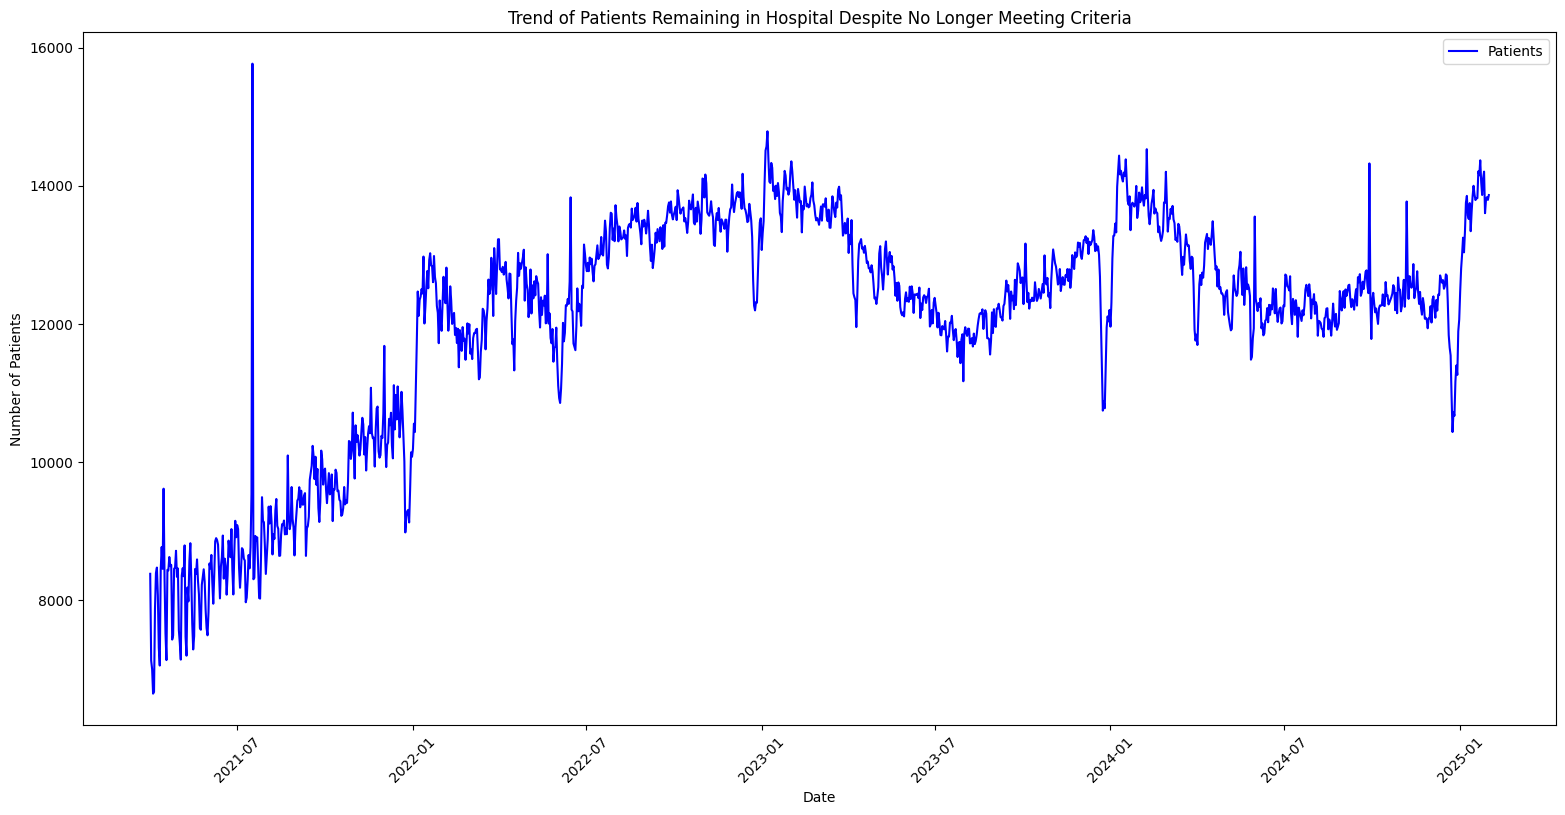

In [18]:
plt.figure(figsize=(19, 9))
plt.plot(df["Date"], df["Patients remaining in hospital who no longer meet the criteria to reside"], label="Patients", color='blue')
plt.xlabel("Date")
plt.ylabel("Number of Patients")
plt.title("Trend of Patients Remaining in Hospital Despite No Longer Meeting Criteria")
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

In [19]:
df.columns = ['ds', 'y']


In [20]:
train = df[:-180]
test = df[-180:]

train.tail()

,ds,y
1217,2024-07-31,12290
1218,2024-08-01,12432
1219,2024-08-02,12147
1220,2024-08-03,12314
1221,2024-08-04,12256


In [21]:
print(train.shape)
print(test.shape)

(1222, 2)
(180, 2)


In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Define parameter grid with increased flexibility
param_grid = {
    'changepoint_prior_scale': [0.5, 1.0, 2.0, 5.0],  # Increased flexibility
    'seasonality_prior_scale': [1.0, 10.0, 20.0, 30.0]  # Higher seasonality impact
}

# Generate all combinations of parameters
params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

mses = []

# Define rolling cutoffs for cross-validation
cutoffs = pd.date_range(start='2021-10-01', end='2023-02-01', freq='3MS')

for param in params:
    # Define model with improved settings
    m = Prophet(
        **param, 
        seasonality_mode='additive',  # Changed from additive to multiplicative
        daily_seasonality=False, 
        weekly_seasonality=True,  
        yearly_seasonality=True,
        n_changepoints=50  # Increased number of changepoints
    )
    
    # Add country holidays
    m.add_country_holidays(country_name='UK')

    # Add additional seasonality for monthly patterns
    m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

    # Add external regressors if available (ensure they exist in 'train' dataset)
    if 'economic_index' in train.columns:
        m.add_regressor('economic_index')
    if 'temperature' in train.columns:
        m.add_regressor('temperature')

    # Fit the model
    m.fit(train)

    # Perform cross-validation with improved settings
    df_cv = cross_validation(
        model=m,
        horizon='90 days',      # Reduced from 180 to 90 days for a shorter test period
        period='60 days',       # Every 2 months instead of 3
        cutoffs=cutoffs,        
        parallel="processes"
    )

    # Evaluate model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    mses.append(df_p['mse'].values[0])

# Store results in a DataFrame
tuning_results = pd.DataFrame(params)
tuning_results['mse'] = mses

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000212A85A8D48>
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000212A8524608>
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000212A85572C8>
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000212A85285C8>
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000212A85A4908>
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Applying in parallel with <concurrent.futures.pr

In [23]:
best_params = params[np.argmin(mses)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 30.0}


In [24]:
m = Prophet(**best_params, seasonality_mode='additive')
m.add_country_holidays(country_name='UK')
m.fit(train);

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [25]:
future = m.make_future_dataframe(periods=180, freq='D')


In [26]:

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
1390,2025-01-20,13767.949141,11404.049360,16275.723052
1391,2025-01-21,13867.156247,11485.805329,16536.305310
1392,2025-01-22,13929.419909,11407.359637,16398.366746
1393,2025-01-23,13901.146529,11405.470124,16486.489555
1394,2025-01-24,13755.682930,11263.753386,16308.212337
1395,2025-01-25,13637.950783,11184.104625,16278.460089
1396,2025-01-26,13552.389941,10992.687235,16243.519476
1397,2025-01-27,13578.485739,11019.898084,16213.173519
1398,2025-01-28,13638.525185,11068.078183,16381.903647
1399,2025-01-29,13668.362067,11079.403476,16299.202948


In [27]:
test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']]
test.head()

,ds,y,yhat,yhat_lower,yhat_upper
1222,2024-08-05,11830,12242.409835,11746.320065,12707.789411
1223,2024-08-06,12045,12360.160349,11848.825149,12863.445752
1224,2024-08-07,12035,12449.588559,11928.948887,12959.571438
1225,2024-08-08,12014,12455.947087,11962.519228,12953.747351
1226,2024-08-09,11933,12351.312000,11844.029038,12864.582482


In [28]:
# Filter the next 180 days including the start date
test['baseline_last_season'] = train.loc[(train['ds'] >= '2023-08-05')].iloc[:180]['y'].values

In [29]:
test['baseline_last_valeu'] = train['y'].iloc[-1]

In [30]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


mape_prophet = mape(test['y'], test['yhat'])

mape_baseline_last_season = mape(test['y'], test['baseline_last_season'])

mape_baseline_last_valeu = mape(test['y'], test['baseline_last_valeu'])


print(mape_prophet)

print(mape_baseline_last_season)

print(mape_baseline_last_valeu)



2.249845534141155
2.9996809507423112
3.7471912600111366


In [31]:
from sklearn.metrics import mean_absolute_error

mae_prophet = mean_absolute_error(test['y'], test['yhat'])
mae_baseline_last_season = mean_absolute_error(test['y'], test['baseline_last_season'])
mae_baseline_last_valeu = mean_absolute_error(test['y'], test['baseline_last_valeu'])

print(mae_prophet)


print(mae_baseline_last_season)

print(mae_baseline_last_valeu)




277.81403741569477
374.52222222222224
483.9


In [32]:
test

,ds,y,yhat,yhat_lower,yhat_upper,baseline_last_season,baseline_last_valeu
1222,2024-08-05,11830,12242.409835,11746.320065,12707.789411,11932,12256
1223,2024-08-06,12045,12360.160349,11848.825149,12863.445752,11931,12256
1224,2024-08-07,12035,12449.588559,11928.948887,12959.571438,11719,12256
1225,2024-08-08,12014,12455.947087,11962.519228,12953.747351,11725,12256
1226,2024-08-09,11933,12351.312000,11844.029038,12864.582482,11795,12256
...,...,...,...,...,...,...,...
1397,2025-01-27,13604,13578.485739,11019.898084,16213.173519,13754,12256
1398,2025-01-28,13795,13638.525185,11068.078183,16381.903647,13998,12256
1399,2025-01-29,13835,13668.362067,11079.403476,16299.202948,13535,12256
1400,2025-01-30,13796,13614.628431,10979.020477,16386.188387,13637,12256


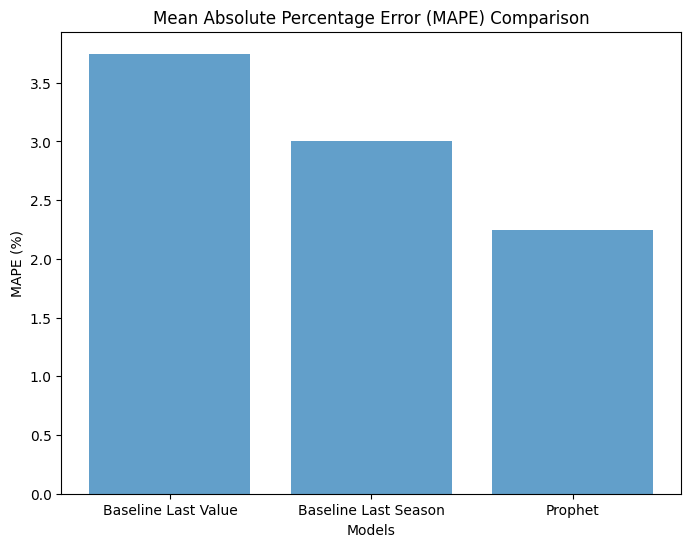

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Load the dataset (assuming it's stored in a DataFrame called test)
# test = pd.read_csv("your_file.csv")  # Uncomment if loading from a file

# Define MAPE function
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE values
mape_baseline_last_valeu = mape(test['y'], test['baseline_last_valeu'])
mape_baseline_last_season = mape(test['y'], test['baseline_last_season'])
mape_prophet = mape(test['y'], test['yhat'])

# Calculate MAE values
mae_baseline_last_valeu = mean_absolute_error(test['y'], test['baseline_last_valeu'])
mae_baseline_last_season = mean_absolute_error(test['y'], test['baseline_last_season'])
mae_prophet = mean_absolute_error(test['y'], test['yhat'])

# Labels and values
labels = ['Baseline Last Value', 'Baseline Last Season', 'Prophet']
mape_values = [mape_baseline_last_valeu, mape_baseline_last_season, mape_prophet]
mae_values = [mae_baseline_last_valeu, mae_baseline_last_season, mae_prophet]

# Use Tableau 10 colors
colors = plt.get_cmap("tab10").colors
color = colors[0]  # Using the first color from Tab10

# MAPE Bar Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, mape_values, color=color, alpha=0.7)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_title('Mean Absolute Percentage Error (MAPE) Comparison')




import re  # Import regex library to handle parenthesis removal
# Get the current plot's title text
current_title = plt.gca().title.get_text()
# Remove or replace '\n' in the title
sanitized_title = current_title.replace(':', ' ')  # Replace '\n' with a space
# Remove anything within parentheses (including the parentheses themselves)
sanitized_title = re.sub(r'\(.*?\)', '', sanitized_title).strip()
# Save the plot with the sanitized title
plt.savefig(os.path.join(plot_save_path, f"{sanitized_title}5.png"), bbox_inches='tight', dpi=300, facecolor='white')

plt.show()


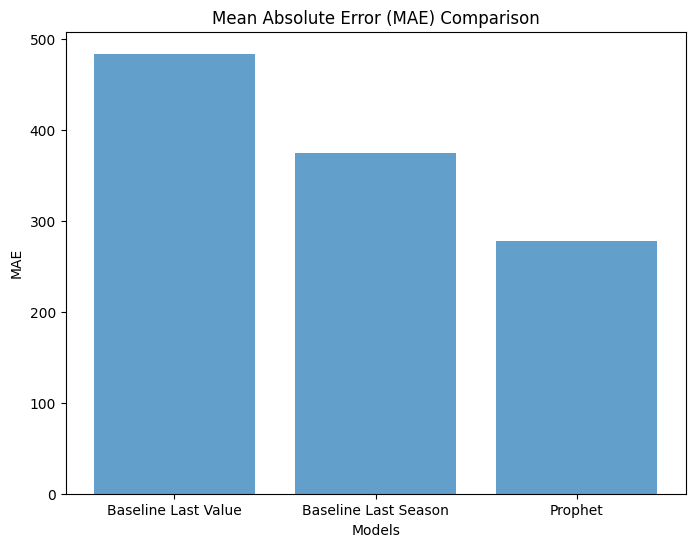

In [34]:
# MAE Bar Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, mae_values, color=color, alpha=0.7)
ax.set_xlabel('Models')
ax.set_ylabel('MAE')
ax.set_title('Mean Absolute Error (MAE) Comparison')


import re  # Import regex library to handle parenthesis removal
# Get the current plot's title text
current_title = plt.gca().title.get_text()
# Remove or replace '\n' in the title
sanitized_title = current_title.replace(':', ' ')  # Replace '\n' with a space
# Remove anything within parentheses (including the parentheses themselves)
sanitized_title = re.sub(r'\(.*?\)', '', sanitized_title).strip()
# Save the plot with the sanitized title
plt.savefig(os.path.join(plot_save_path, f"{sanitized_title}6.png"), bbox_inches='tight', dpi=300, facecolor='white')

plt.show()

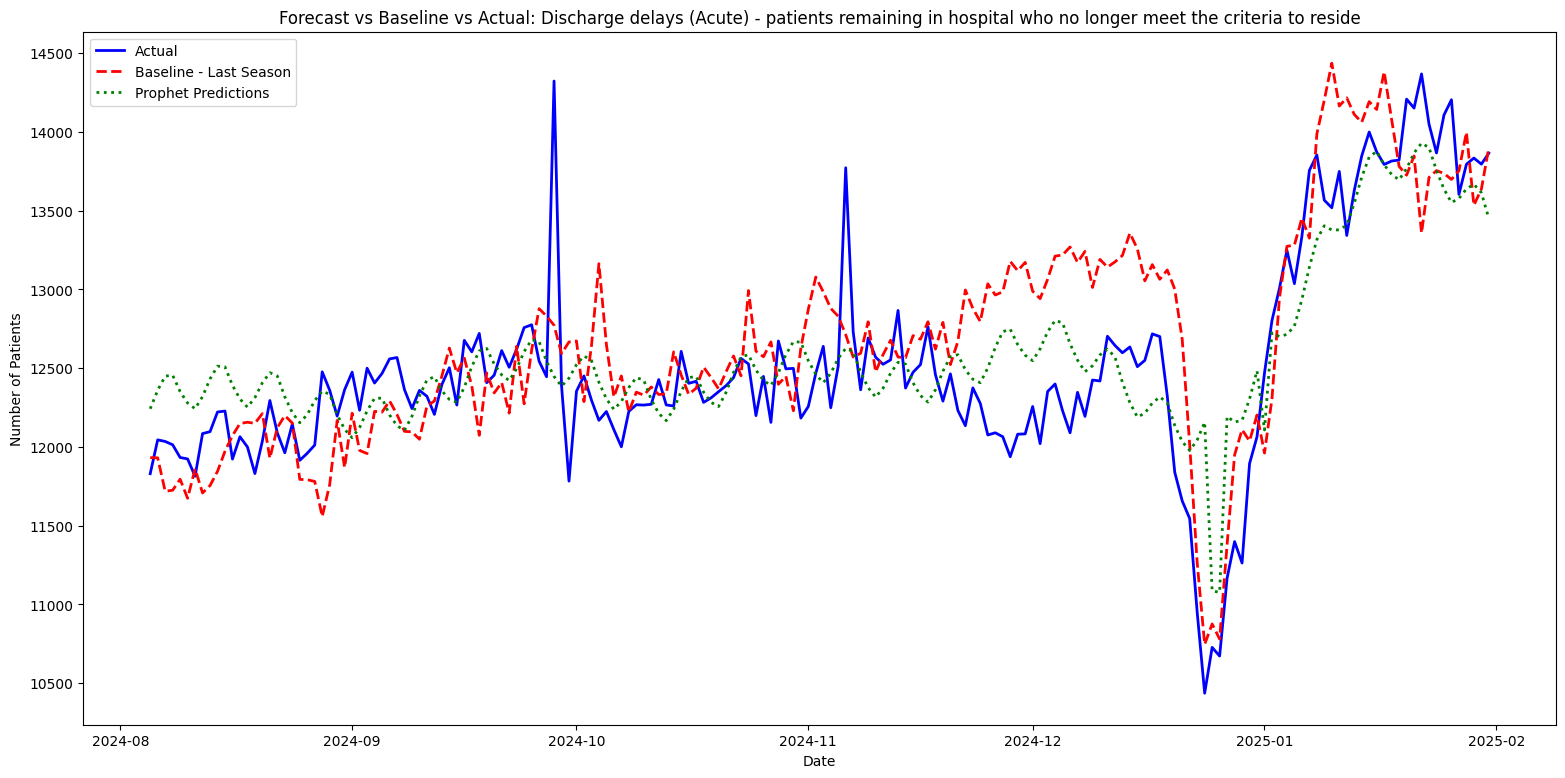

In [35]:
# Plot the data
plt.figure(figsize=(19, 9))

plt.plot(test["ds"], test["y"], label="Actual", color="blue", linewidth=2)
plt.plot(test["ds"], test["baseline_last_season"], label="Baseline - Last Season", color="red", linestyle="dashed", linewidth=2)
plt.plot(test["ds"], test["yhat"], label="Prophet Predictions", color="green", linestyle="dotted", linewidth=2)


# Labels and title
plt.xlabel("Date")
plt.ylabel("Number of Patients")
plt.title("Forecast vs Baseline vs Actual: Discharge delays (Acute) - patients remaining in hospital who no longer meet the criteria to reside")

# Show legend
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=0)

import re  # Import regex library to handle parenthesis removal
# Get the current plot's title text
current_title = plt.gca().title.get_text()
# Remove or replace '\n' in the title
sanitized_title = current_title.replace(':', ' ')  # Replace '\n' with a space
# Remove anything within parentheses (including the parentheses themselves)
sanitized_title = re.sub(r'\(.*?\)', '', sanitized_title).strip()
# Save the plot with the sanitized title
plt.savefig(os.path.join(plot_save_path, f"{sanitized_title}1.png"), bbox_inches='tight', dpi=300, facecolor='white')
    

# Display the plot
plt.show()

In [36]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add actual data
fig.add_trace(go.Scatter(x=test["ds"], y=test["y"], mode='lines', name='Actual', line=dict(color='blue', width=2)))

# Add baseline data (last season)
fig.add_trace(go.Scatter(x=test["ds"], y=test["baseline_last_season"], mode='lines', name='Baseline - Last Season', 
                         line=dict(color='red', width=2, dash='dash')))

# Add Prophet predictions
fig.add_trace(go.Scatter(x=test["ds"], y=test["yhat"], mode='lines', name='Prophet Predictions', 
                         line=dict(color='green', width=2, dash='dot')))

# Update layout for better visibility and interactivity
fig.update_layout(
    title="Forecast vs Baseline vs Actual: Discharge delays (Acute) - patients remaining in hospital who no longer meet the criteria to reside",
    xaxis_title="Date",
    yaxis_title="Number of Patients",
    legend_title="Legend",
    xaxis=dict(showgrid=True, tickangle=0),
    yaxis=dict(showgrid=True),
    hovermode="x unified"
)



# Show the interactive plot
fig.show()


In [37]:
import plotly.graph_objects as go

# Ensure test is available
if 'test' in globals() and not test.empty:
    # Filter for the first 30 days
    test_30 = test.iloc[0:60]

    # Create the interactive figure
    fig = go.Figure()

    # Add actual data
    fig.add_trace(go.Scatter(x=test_30["ds"], y=test_30["y"], mode='lines', name='Actual', line=dict(color='blue', width=2)))

    # Add baseline data (last season)
    fig.add_trace(go.Scatter(x=test_30["ds"], y=test_30["baseline_last_season"], mode='lines', name='Baseline - Last Season', 
                             line=dict(color='red', width=2, dash='dash')))

    # Add Prophet predictions
    fig.add_trace(go.Scatter(x=test_30["ds"], y=test_30["yhat"], mode='lines', name='Prophet Predictions', 
                             line=dict(color='green', width=2, dash='dot')))

    # Update layout for better visibility and interactivity
    fig.update_layout(
        title="Forecast vs Baseline vs Actual: Discharge delays (Acute) - patients remaining in hospital who no longer meet the criteria to reside",
        xaxis_title="Date",
        yaxis_title="Number of Patients",
        legend_title="Legend",
        xaxis=dict(showgrid=True, tickangle=0),
        yaxis=dict(showgrid=True),
        hovermode="x unified"
    )

    # Show the interactive plot
    fig.show()
else:
    print("Dataset 'test' is not available. Please upload the data.")


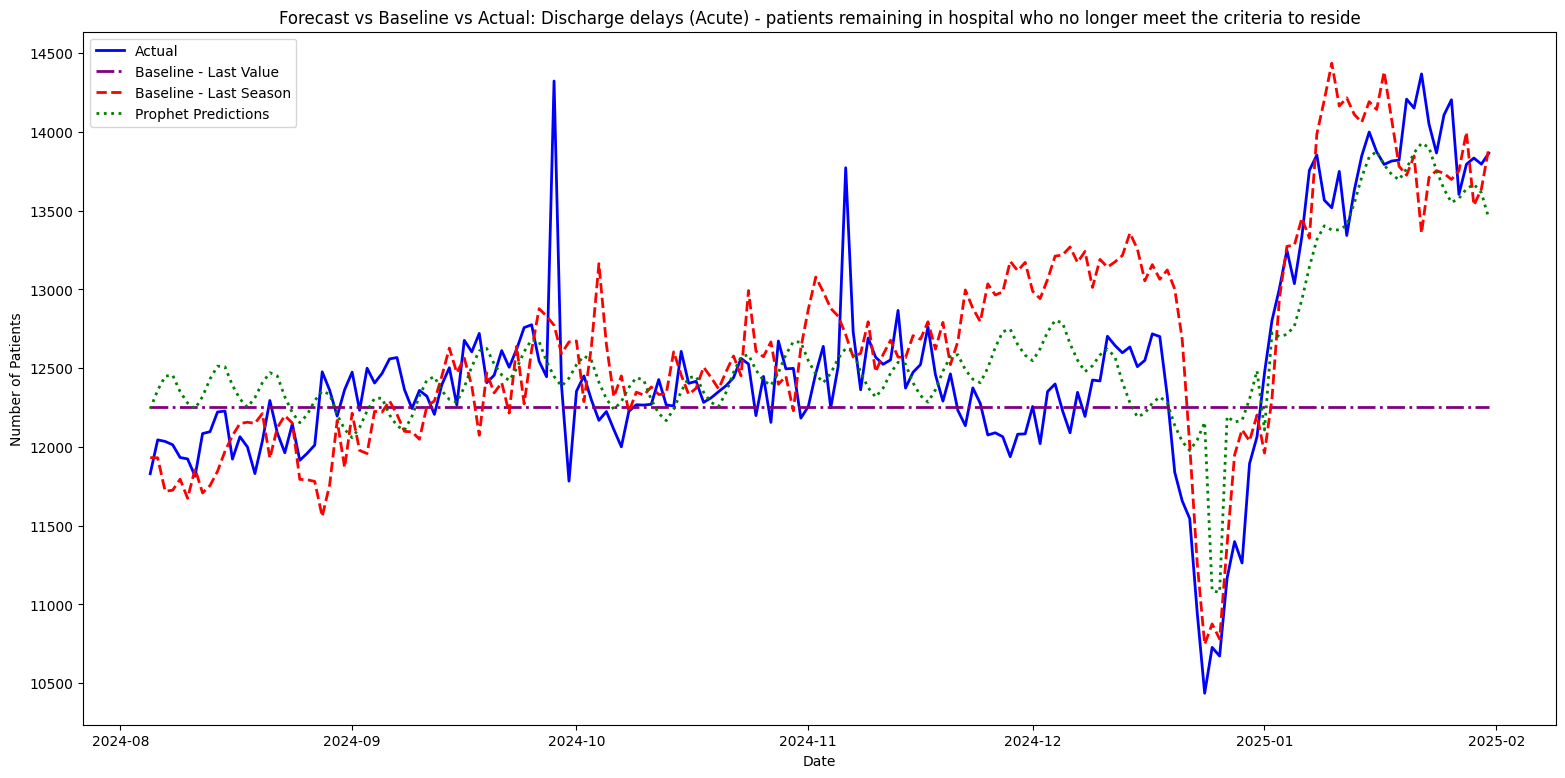

In [38]:
# Plot the data
plt.figure(figsize=(19, 9))

plt.plot(test["ds"], test["y"], label="Actual", color="blue", linewidth=2)
plt.plot(test["ds"], test["baseline_last_valeu"], label="Baseline - Last Value", color="purple", linestyle="dashdot", linewidth=2)
plt.plot(test["ds"], test["baseline_last_season"], label="Baseline - Last Season", color="red", linestyle="dashed", linewidth=2)
plt.plot(test["ds"], test["yhat"], label="Prophet Predictions", color="green", linestyle="dotted", linewidth=2)


# Labels and title
plt.xlabel("Date")
plt.ylabel("Number of Patients")
plt.title("Forecast vs Baseline vs Actual: Discharge delays (Acute) - patients remaining in hospital who no longer meet the criteria to reside")

# Show legend
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=0)

import re  # Import regex library to handle parenthesis removal
# Get the current plot's title text
current_title = plt.gca().title.get_text()
# Remove or replace '\n' in the title
sanitized_title = current_title.replace(':', ' ')  # Replace '\n' with a space
# Remove anything within parentheses (including the parentheses themselves)
sanitized_title = re.sub(r'\(.*?\)', '', sanitized_title).strip()
# Save the plot with the sanitized title
plt.savefig(os.path.join(plot_save_path, f"{sanitized_title}2.png"), bbox_inches='tight', dpi=300, facecolor='white')

# Display the plot
plt.show()

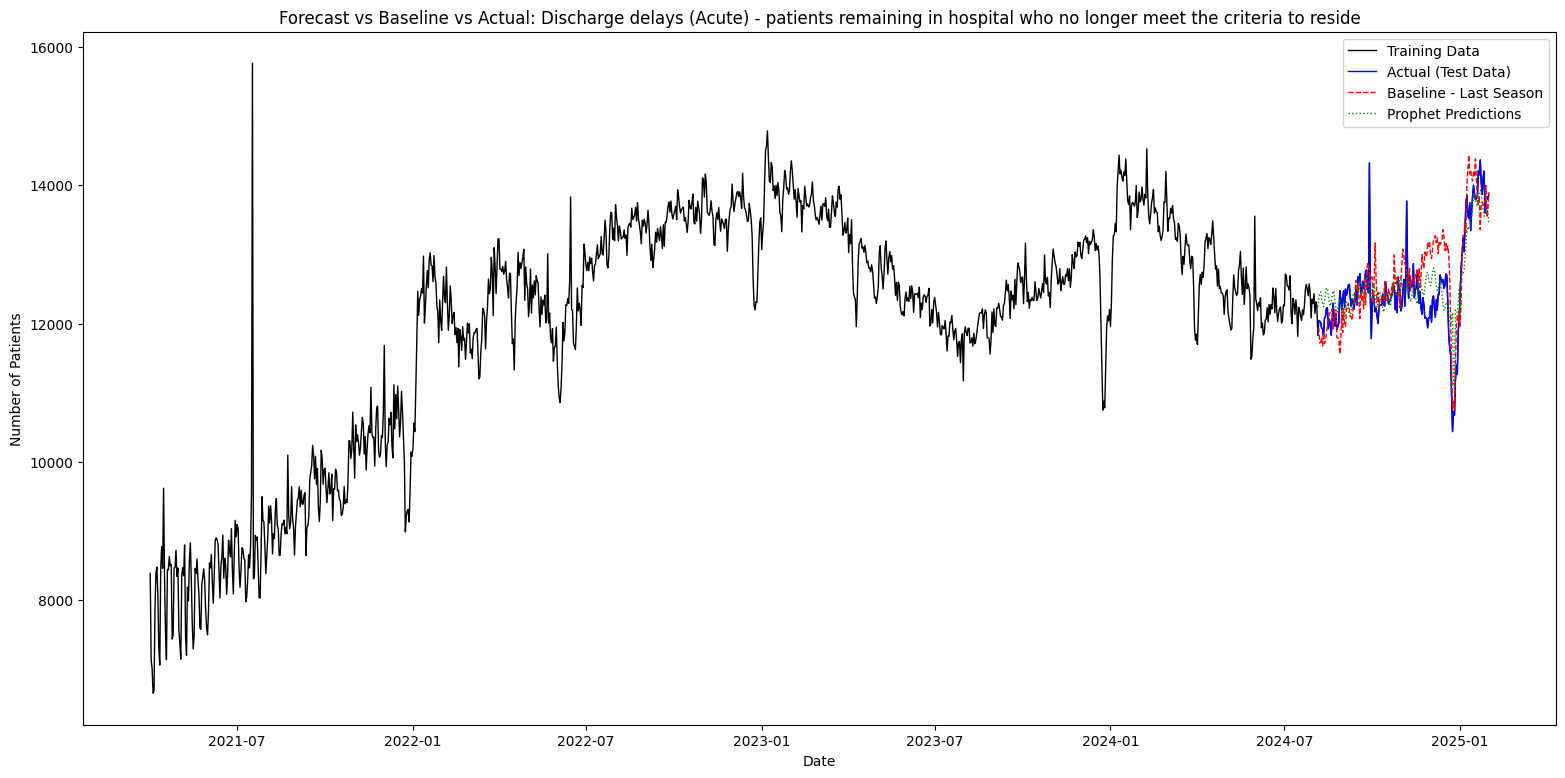

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Combine train and test for actual values
actual_data = pd.concat([train, test], axis=0)

# Create the figure
plt.figure(figsize=(19, 9))

# Plot actual data with continuous connection, training in black and test in blue
plt.plot(actual_data["ds"], actual_data["y"], color="black", linewidth=1, label="Training Data")
plt.plot(test["ds"], test["y"], color="blue", linewidth=1, label="Actual (Test Data)")  # Overlay test data in blue

# Plot the baseline model predictions
plt.plot(test["ds"], test["baseline_last_season"], label="Baseline - Last Season", color="red", linestyle="dashed", linewidth=1)

# Plot the Prophet model predictions
plt.plot(test["ds"], test["yhat"], label="Prophet Predictions", color="green", linestyle="dotted", linewidth=1)

# Labels and title
plt.xlabel("Date")
plt.ylabel("Number of Patients")
plt.title("Forecast vs Baseline vs Actual: Discharge delays (Acute) - patients remaining in hospital who no longer meet the criteria to reside")

# Show legend
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=0)

import re  # Import regex library to handle parenthesis removal
# Get the current plot's title text
current_title = plt.gca().title.get_text()
# Remove or replace '\n' in the title
sanitized_title = current_title.replace(':', ' ')  # Replace '\n' with a space
# Remove anything within parentheses (including the parentheses themselves)
sanitized_title = re.sub(r'\(.*?\)', '', sanitized_title).strip()
# Save the plot with the sanitized title
plt.savefig(os.path.join(plot_save_path, f"{sanitized_title}3.png"), bbox_inches='tight', dpi=300, facecolor='white')

# Display the plot
plt.show()



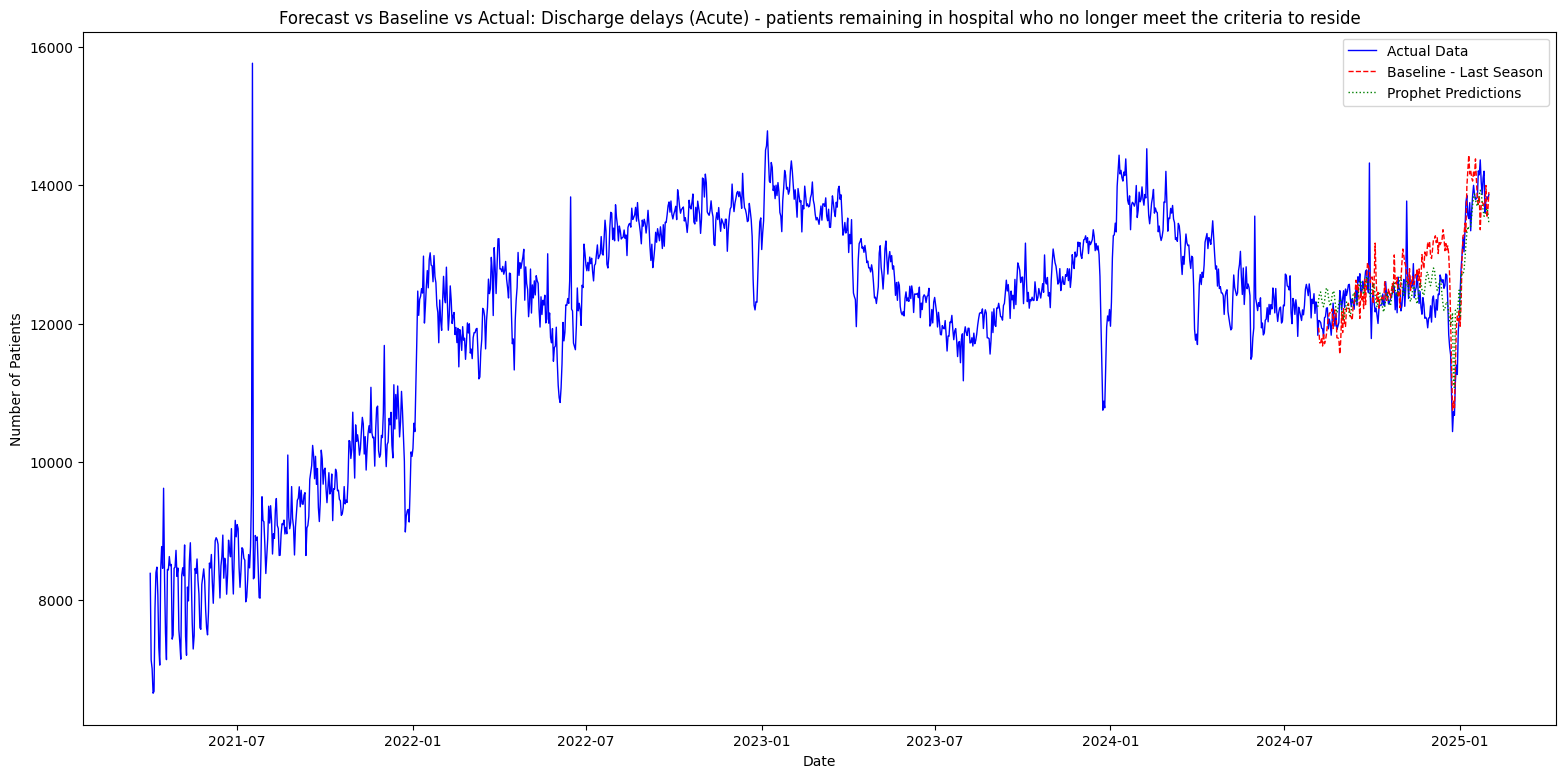

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Combine train and test for actual values
actual_data = pd.concat([train, test], axis=0)

# Create the figure
plt.figure(figsize=(19, 9))

# Plot actual values as a continuous line
plt.plot(actual_data["ds"], actual_data["y"], label="Actual Data", color="blue", linewidth=1)

# Plot the baseline model predictions
plt.plot(test["ds"], test["baseline_last_season"], label="Baseline - Last Season", color="red", linestyle="dashed", linewidth=1)

# Plot the Prophet model predictions
plt.plot(test["ds"], test["yhat"], label="Prophet Predictions", color="green", linestyle="dotted", linewidth=1)

# Labels and title
plt.xlabel("Date")
plt.ylabel("Number of Patients")
plt.title("Forecast vs Baseline vs Actual: Discharge delays (Acute) - patients remaining in hospital who no longer meet the criteria to reside")

# Show legend
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=0)

import re  # Import regex library to handle parenthesis removal
# Get the current plot's title text
current_title = plt.gca().title.get_text()
# Remove or replace '\n' in the title
sanitized_title = current_title.replace(':', ' ')  # Replace '\n' with a space
# Remove anything within parentheses (including the parentheses themselves)
sanitized_title = re.sub(r'\(.*?\)', '', sanitized_title).strip()
# Save the plot with the sanitized title
plt.savefig(os.path.join(plot_save_path, f"{sanitized_title}4.png"), bbox_inches='tight', dpi=300, facecolor='white')

# Display the plot
plt.show()


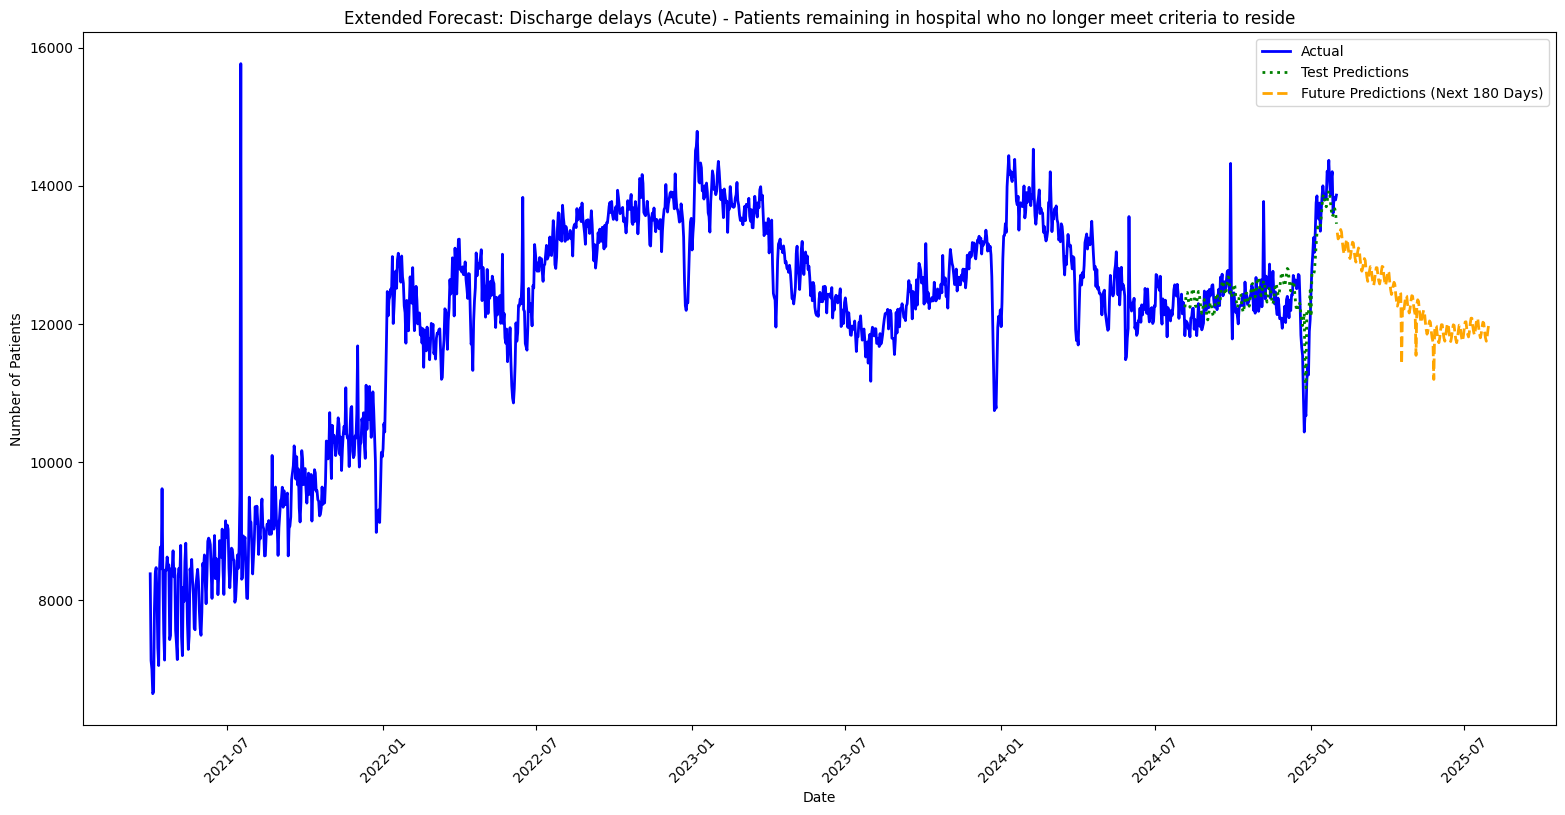

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Boxing Day,Boxing Day_lower,Boxing Day_upper,Boxing Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1402,2025-02-01,12457.058943,10595.126975,16061.192390,9776.811653,15152.007535,0.0,0.0,0.0,0.0,...,-84.782184,-84.782184,-84.782184,949.189393,949.189393,949.189393,0.0,0.0,0.0,13321.466152
1403,2025-02-02,12456.033121,10465.324313,16019.936340,9754.569252,15172.035430,0.0,0.0,0.0,0.0,...,-130.982864,-130.982864,-130.982864,905.969285,905.969285,905.969285,0.0,0.0,0.0,13231.019542
1404,2025-02-03,12455.007298,10519.663557,16063.919816,9733.571915,15191.671608,0.0,0.0,0.0,0.0,...,-61.875988,-61.875988,-61.875988,865.326760,865.326760,865.326760,0.0,0.0,0.0,13258.458070
1405,2025-02-04,12453.981476,10597.717265,16273.239489,9712.574578,15211.307785,0.0,0.0,0.0,0.0,...,43.773055,43.773055,43.773055,827.771252,827.771252,827.771252,0.0,0.0,0.0,13325.525782
1406,2025-02-05,12452.955653,10568.151479,16249.841991,9691.577240,15236.184311,0.0,0.0,0.0,0.0,...,120.784092,120.784092,120.784092,793.683224,793.683224,793.683224,0.0,0.0,0.0,13367.422970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,2025-07-26,12277.539992,4510.519536,19507.652793,5003.852645,20048.750500,0.0,0.0,0.0,0.0,...,-84.782184,-84.782184,-84.782184,-392.102577,-392.102577,-392.102577,0.0,0.0,0.0,11800.655231
1578,2025-07-27,12276.514169,4313.064169,19734.273733,4974.842737,20068.995104,0.0,0.0,0.0,0.0,...,-130.982864,-130.982864,-130.982864,-394.933484,-394.933484,-394.933484,0.0,0.0,0.0,11750.597822
1579,2025-07-28,12275.488347,4417.863242,19714.217597,4927.800971,20089.239708,0.0,0.0,0.0,0.0,...,-61.875988,-61.875988,-61.875988,-396.073093,-396.073093,-396.073093,0.0,0.0,0.0,11817.539266
1580,2025-07-29,12274.462524,4476.555940,19845.154589,4861.089429,20109.484312,0.0,0.0,0.0,0.0,...,43.773055,43.773055,43.773055,-395.385768,-395.385768,-395.385768,0.0,0.0,0.0,11922.849811


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Extend future prediction by 180 days beyond the test dataset
future_extended = m.make_future_dataframe(periods=360, freq='D')  # 180 days test + 180 days future
forecast_extended = m.predict(future_extended)

# Extract only the new forecast period
future_180_days = forecast_extended.iloc[len(train) + len(test):]

# Visualize the extended forecast
plt.figure(figsize=(19, 9))
plt.plot(df["ds"], df["y"], label="Actual", color="blue", linewidth=2)
plt.plot(test["ds"], test["yhat"], label="Test Predictions", color="green", linestyle="dotted", linewidth=2)
plt.plot(future_180_days["ds"], future_180_days["yhat"], label="Future Predictions (Next 180 Days)", color="orange", linestyle="dashed", linewidth=2)

# Labels and title
plt.xlabel("Date")
plt.ylabel("Number of Patients")
plt.title("Extended Forecast: Discharge delays (Acute) - Patients remaining in hospital who no longer meet criteria to reside")

# Show legend
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

import re  # Import regex library to handle parenthesis removal
# Get the current plot's title text
current_title = plt.gca().title.get_text()
# Remove or replace '\n' in the title
sanitized_title = current_title.replace(':', ' ')  # Replace '\n' with a space
# Remove anything within parentheses (including the parentheses themselves)
sanitized_title = re.sub(r'\(.*?\)', '', sanitized_title).strip()
# Save the plot with the sanitized title
plt.savefig(os.path.join(plot_save_path, f"{sanitized_title}7.png"), bbox_inches='tight', dpi=300, facecolor='white')

# Display the plot
plt.show()

future_180_days

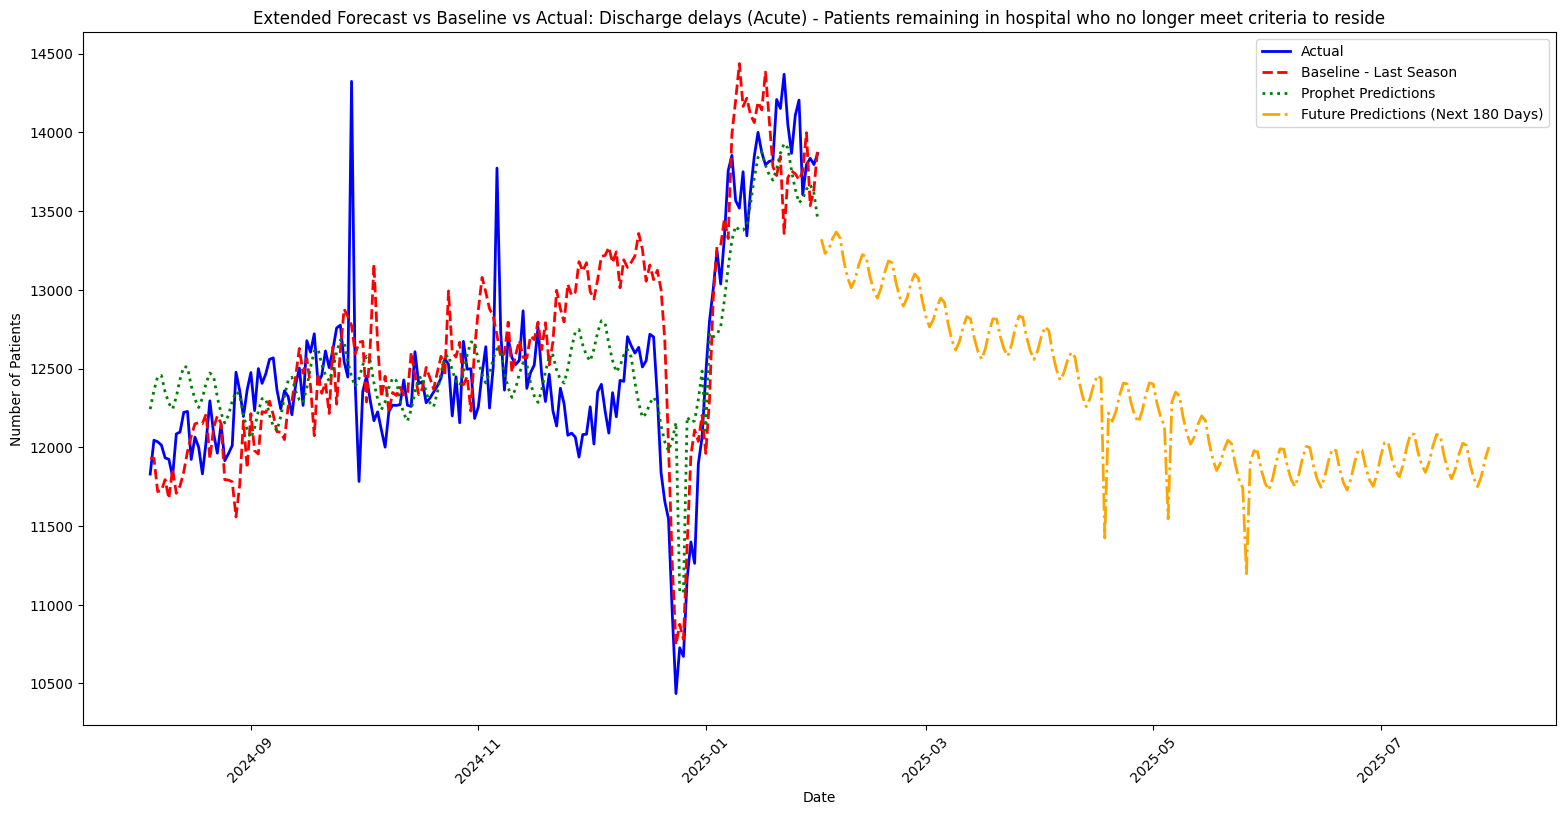

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Extend future prediction by 180 days beyond the test dataset
future_extended = m.make_future_dataframe(periods=360, freq='D')  # 180 days test + 180 days future
forecast_extended = m.predict(future_extended)

# Extract only the new forecast period
future_180_days = forecast_extended.iloc[len(train) + len(test):]

# Create the figure
plt.figure(figsize=(19, 9))

# Plot actual test data
plt.plot(test["ds"], test["y"], label="Actual", color="blue", linewidth=2)
plt.plot(test["ds"], test["baseline_last_season"], label="Baseline - Last Season", color="red", linestyle="dashed", linewidth=2)
plt.plot(test["ds"], test["yhat"], label="Prophet Predictions", color="green", linestyle="dotted", linewidth=2)

# Append future forecast
plt.plot(future_180_days["ds"], future_180_days["yhat"], label="Future Predictions (Next 180 Days)", color="orange", linestyle="dashdot", linewidth=2)

# Labels and title
plt.xlabel("Date")
plt.ylabel("Number of Patients")
plt.title("Extended Forecast vs Baseline vs Actual: Discharge delays (Acute) - Patients remaining in hospital who no longer meet criteria to reside")

# Show legend
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Save the plot
sanitized_title = "Extended_Forecast_vs_Baseline_vs_Actual_Discharge_delays"
plt.savefig(os.path.join(plot_save_path, f"{sanitized_title}.png"), bbox_inches='tight', dpi=300, facecolor='white')

import re  # Import regex library to handle parenthesis removal
# Get the current plot's title text
current_title = plt.gca().title.get_text()
# Remove or replace '\n' in the title
sanitized_title = current_title.replace(':', ' ')  # Replace '\n' with a space
# Remove anything within parentheses (including the parentheses themselves)
sanitized_title = re.sub(r'\(.*?\)', '', sanitized_title).strip()
# Save the plot with the sanitized title
plt.savefig(os.path.join(plot_save_path, f"{sanitized_title}8.png"), bbox_inches='tight', dpi=300, facecolor='white')

# Display the plot
plt.show()




In [43]:
test

,ds,y,yhat,yhat_lower,yhat_upper,baseline_last_season,baseline_last_valeu
1222,2024-08-05,11830,12242.409835,11746.320065,12707.789411,11932,12256
1223,2024-08-06,12045,12360.160349,11848.825149,12863.445752,11931,12256
1224,2024-08-07,12035,12449.588559,11928.948887,12959.571438,11719,12256
1225,2024-08-08,12014,12455.947087,11962.519228,12953.747351,11725,12256
1226,2024-08-09,11933,12351.312000,11844.029038,12864.582482,11795,12256
...,...,...,...,...,...,...,...
1397,2025-01-27,13604,13578.485739,11019.898084,16213.173519,13754,12256
1398,2025-01-28,13795,13638.525185,11068.078183,16381.903647,13998,12256
1399,2025-01-29,13835,13668.362067,11079.403476,16299.202948,13535,12256
1400,2025-01-30,13796,13614.628431,10979.020477,16386.188387,13637,12256


In [44]:
# Export to Excel
test.to_excel("forecast_results.xlsx", index=False)
